In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 fro

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object')}

In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
df.loc[df['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
df.loc[df['TotalCharges'].isna()==True]=0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [13]:
for i in df:
    print(i)
    print(df[i].unique(),'\n')
    print(df[i].value_counts(),'\n')


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

0             11
0056-EPFBG     1
5651-WYIPH     1
9480-BQJEI     1
2826-DXLQO     1
5134-IKDAY     1
9633-XQABV     1
5020-ZSTTY     1
3882-IYOIJ     1
7409-JURKQ     1
2274-XUATA     1
0870-VEMYL     1
2030-BTZRO     1
6786-OBWQR     1
7632-MNYOY     1
9695-IDRZR     1
4695-VADHF     1
4727-MCYZG     1
4391-RESHN     1
1494-EJZDW     1
5562-YJQGT     1
2761-XECQW     1
7643-RCHXS     1
3913-FCUUW     1
9405-GPBBG     1
7562-GSUHK     1
9052-DHNKM     1
6198-ZFIOJ     1
8873-GLDMH     1
3272-VUHPV     1
              ..
4544-RXFMG     1
7989-AWGEH     1
2296-DKZFP     1
6918-UMQCG     1
9693-XMUOB     1
4468-KAZHE     1
4480-QQRHC     1
8779-QRDMV     1
6651-AZVTJ     1
5919-VCZYM     1
8498-XXGWA     1
5119-NZPTV     1
0123-CRBRT     1
2252-JHJGE     1
4559-UWIHT     1
6357-JJPQT     1
6496-JDSSB     1
1932-UEDCX     1
6894-LFHLY     1
9661-MHUMO     1
7963-GQRMY     1
1403-LKLIK     1
9

In [14]:
df.drop(['customerID'],inplace=True,axis=1)

In [15]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)

In [16]:
df['Partner'].replace(['Yes','No'],[0,1],inplace=True)

In [17]:
df['Dependents'].replace(['Yes','No'],[0,1],inplace=True)

In [18]:
df['PhoneService'].replace(['Yes','No'],[0,1],inplace=True)

In [19]:
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[2,0,1],inplace=True)

In [20]:
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)

In [21]:
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [22]:
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [23]:
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [24]:
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [25]:
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [26]:
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [27]:
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)

In [28]:
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [29]:
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [30]:
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


In [32]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [33]:
from sklearn.utils import resample
df_0 = df[df['Churn']==0]
df_1 = df[df['Churn']==1]

df_1_ups = resample(df_1,replace=True,n_samples=5174,random_state=123) 
 
df_new = pd.concat([df_0, df_1_ups])

In [34]:
df_new['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [35]:
x=df_new.iloc[:,:-1]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,1,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85
1,0,0,1,1,34,0,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50
3,0,0,1,1,45,1,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75
6,0,0,1,0,22,0,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40
7,1,0,1,1,10,1,2,1,1,0,0,0,0,0,0,0,1,29.75,301.90


In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [37]:
y=df_new.iloc[:,-1]
y.head()

0    0
1    0
3    0
6    0
7    0
Name: Churn, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45,stratify=y)

In [39]:
print(x_train.shape,x_test.shape)

(7243, 19) (3105, 19)


In [40]:
print(y_train.shape,y_test.shape)

(7243,) (3105,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [42]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [43]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))


In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Accuracy_score =  0.7574879227053141


Cross_Val_Score =  0.7757053613436591


roc_auc_score =  0.7574583363758872


classification_report
               precision    recall  f1-score   support

           0       0.82      0.67      0.73      1552
           1       0.72      0.85      0.78      1553

   micro avg       0.76      0.76      0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105



[[1033  519]
 [ 234 1319]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probabil

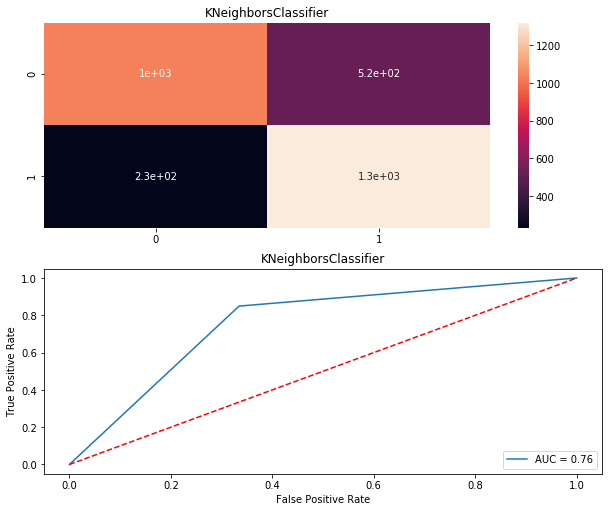

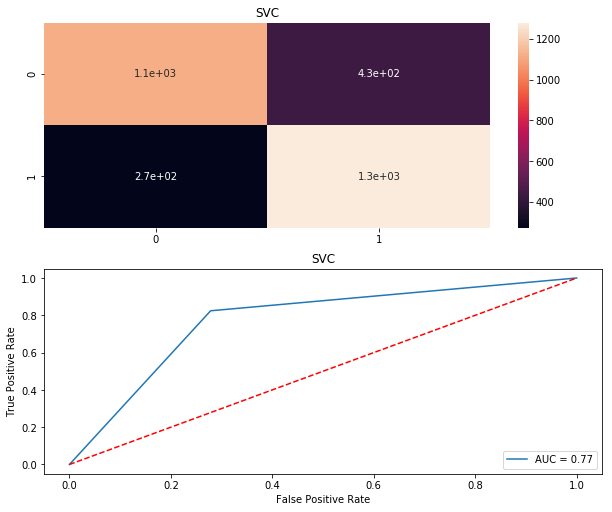

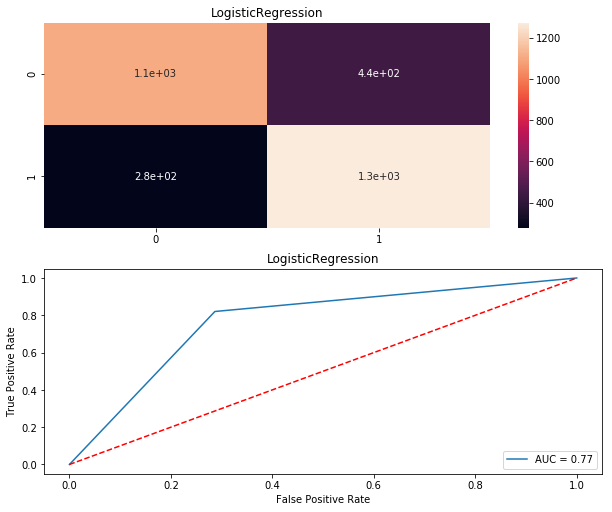

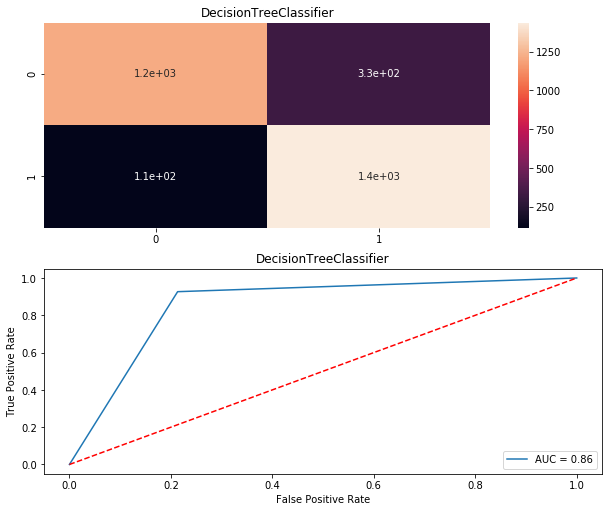

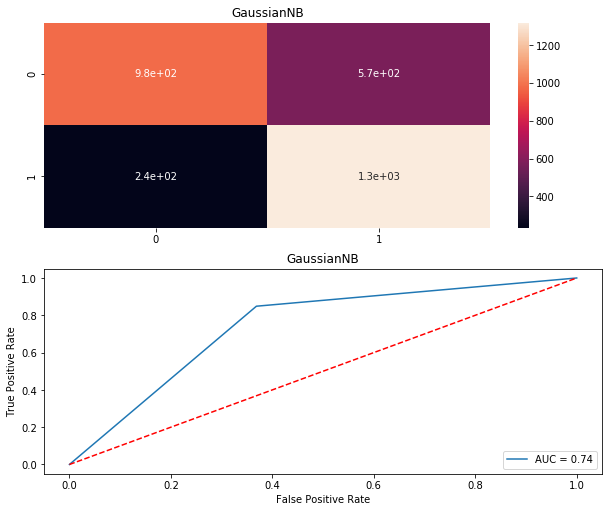

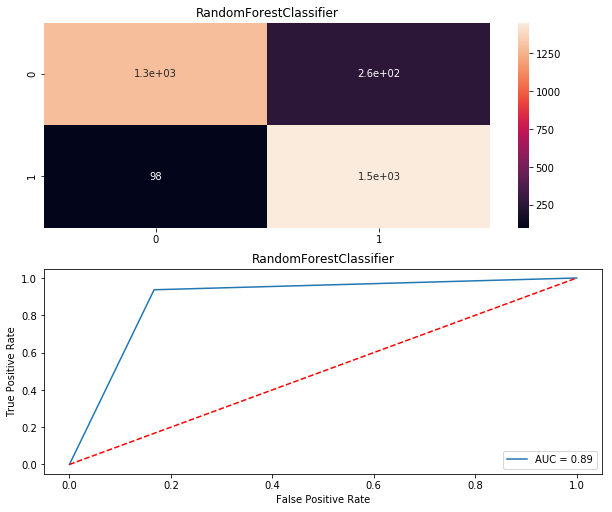

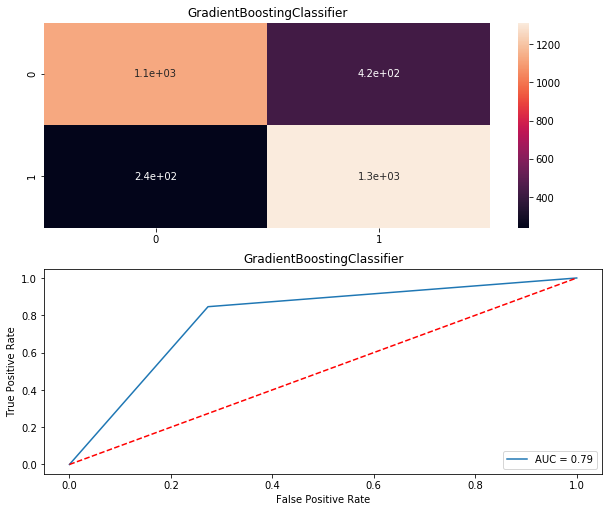

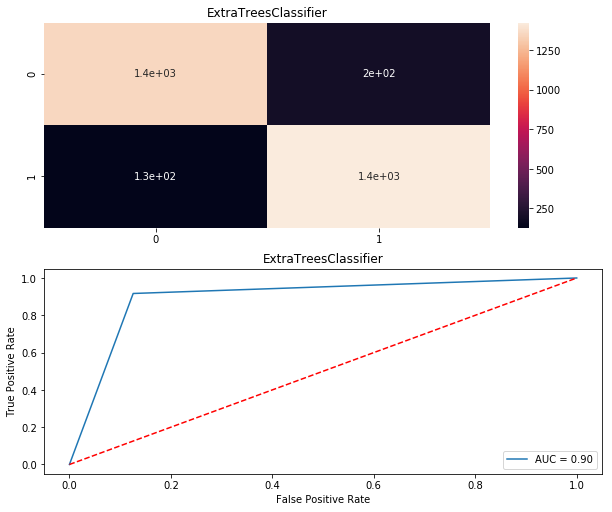

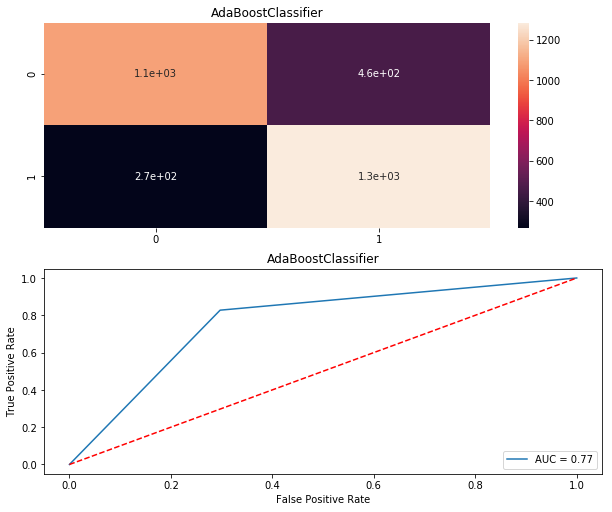

In [45]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [46]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,75.748792,77.570536,75.745834
1,SVC,77.294686,78.285755,77.293034
2,LogisticRegression,76.682770,76.913568,76.681045
3,DecisionTreeClassifier,85.668277,88.297331,85.666025
4,GaussianNB,74.009662,74.033517,74.006164
5,RandomForestClassifier,88.502415,91.370115,88.500744
6,GradientBoostingClassifier,78.647343,79.880585,78.645422
7,ExtraTreesClassifier,89.565217,92.191717,89.564532
8,AdaBoostClassifier,76.521739,77.097115,76.519735


**I choose ExtraTreesClassifier as my final model because it perform very well on our dataset and also has good accuracy_score and Good Cross_val_score**

Accuracy_score = 89.565217

Cross_val_score = 92.191717

Roc_auc_curve = 89.564532

In [48]:
from sklearn.externals import joblib
joblib.dump(ETC,"model_Customer_churn.csv")

['model_Customer_churn.csv']

In [49]:
model=joblib.load("model_Customer_churn.csv")
model.predict(x_test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)